# Creates various benchmarks/baseline measures for GDP

### Phase 1: Create Baselines
In this script, we create baseline forecasts for GDP metrics of all countries for the year 2022 in 3 different ways:
1. Using T-1 prediction (repeat 2021 value) for 2022
2. Using expert prediction: by taking as given values from human experts (eg. IMF and World Bank)
3. Using an xgboost model trained on data from 2001 to 2020 to predict 2021

### Phase 2: Create error metrics
Compare how the LLM forecast compares to these 3 metrics

### Phase 3: Visualize results
Compare performance in tables, plots

## Setup

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
cleaned_gdp_countries = pd.read_csv('cleaned_gdp_df_countries.csv')
transformed_gdp_df = pd.read_csv('transformed_gdp_df_countries.csv')

In [5]:
PREDICTION_YEAR = '2022'

In [23]:
def error_mae(y_hat, y_true):
  '''
  Given a set of predicted values and the true labels as lists,
  return a scalar value containing the mean absolute error between
  the two
  '''
  err = y_true - y_hat
  abs_err = np.abs(err)
  mae = np.mean(abs_err)
  return mae

In [27]:
def error_mape(y_hat, y_true):
  '''
  Given a set of predicted values and the true labels as lists,
  return a scalar value containing the mean absolute predicted
  error between the two
  mape = average of |(y_true - y_hat)/y_true|
  https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
  '''
  err = y_true - y_hat
  relative_err = err/y_true
  abs_relative_err = np.abs(relative_err)
  mape = np.mean(abs_relative_err)
  return mape

In [14]:
# drop any rows with nan values
print(cleaned_gdp_countries.shape[0])
cleaned_gdp_countries_df = cleaned_gdp_countries.dropna()
print(cleaned_gdp_countries_df.shape[0])

140
140


## Phase 1
In this script, we create baseline forecasts for GDP metrics of all countries for the year 2022 in 3 different ways:
1. Using T-1 prediction (repeat 2021 value) for 2022
2. Using expert prediction: by taking as given values from human experts (eg. IMF and World Bank)
3. Using an xgboost model trained on data from 2001 to 2020 to predict 2021

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Using T-1

In [7]:
T_MINUS_1 = '2021'

In [10]:
t1_baseline_gdp_df = cleaned_gdp_countries[['country', T_MINUS_1, PREDICTION_YEAR]]
t1_baseline_gdp_df.head()

,country,2021,2022
0,Albania,18.0,19.1
1,Algeria,163.1,195.1
2,Angola,74.9,122.8
3,Antigua and Barbuda,1.6,1.8
4,Argentina,487.4,630.6


#### MAE

In [24]:
t_minus_1_mae = error_mae(cleaned_gdp_countries[T_MINUS_1], cleaned_gdp_countries[PREDICTION_YEAR])
print('T minus 1 MAE = ', t_minus_1_mae)

T minus 1 MAE =  45.56357142857144


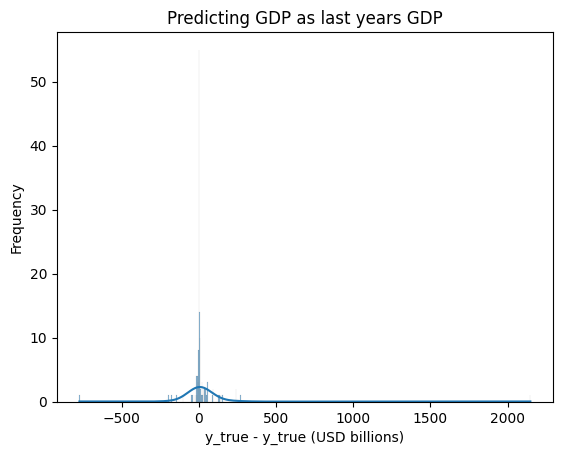

In [26]:
t1_baseline_gdp_df['error'] = t1_baseline_gdp_df[PREDICTION_YEAR] - t1_baseline_gdp_df[T_MINUS_1]
sns.histplot(t1_baseline_gdp_df['error'], kde=True)
plt.xlabel('y_true - y_true (USD billions)')
plt.ylabel('Frequency')
plt.title('Predicting GDP as last years GDP')
plt.show()

#### MAPE

In [28]:
t_minus_1_mape = error_mape(cleaned_gdp_countries[T_MINUS_1], cleaned_gdp_countries[PREDICTION_YEAR])
print('T minus 1 MAPE = ', t_minus_1_mape)

T minus 1 MAPE =  0.08585637240172424


<ipython-input-29-d9574b35dcaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_baseline_gdp_df['relative_error'] = (t1_baseline_gdp_df[PREDICTION_YEAR] - t1_baseline_gdp_df[T_MINUS_1])/t1_baseline_gdp_df[PREDICTION_YEAR]


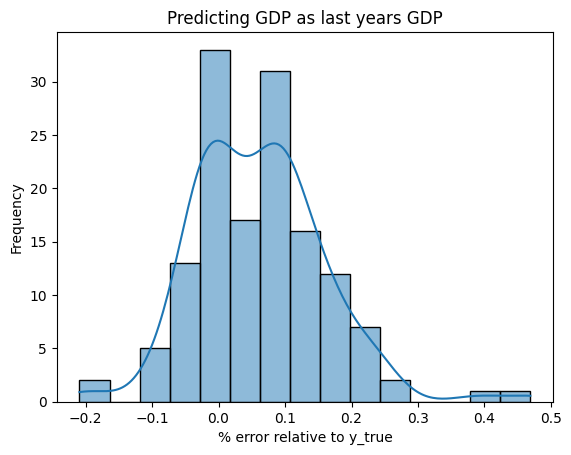

In [29]:
t1_baseline_gdp_df['relative_error'] = (t1_baseline_gdp_df[PREDICTION_YEAR] - t1_baseline_gdp_df[T_MINUS_1])/t1_baseline_gdp_df[PREDICTION_YEAR]
sns.histplot(t1_baseline_gdp_df['relative_error'], kde=True)
plt.xlabel('% error relative to y_true')
plt.ylabel('Frequency')
plt.title('Predicting GDP as last years GDP')
plt.show()

## Visualizations

### Single country - before and after transformation

In [ ]:
country_of_choice = 'India'

#### Before

In [ ]:
# before
plot_cleaned_gdp_df = cleaned_gdp_df[cleaned_gdp_df['country'] == country_of_choice]
plot_cleaned_gdp_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,country
62,189.438,196.535,203.537,222.049,215.556,237.618,252.751,283.75,299.645,301.234,...,2671.596,3150.307,3389.689,3732.224,4105.381,4511.847,4951.615,5427.392,5944.382,India


In [ ]:
country_melted_df = pd.melt(plot_cleaned_gdp_df, id_vars=['country'], var_name='year', value_name='gdp')
country_melted_df.head()

,country,year,gdp
0,India,1980,189.438
1,India,1981,196.535
2,India,1982,203.537
3,India,1983,222.049
4,India,1984,215.556


AttributeError: ignored

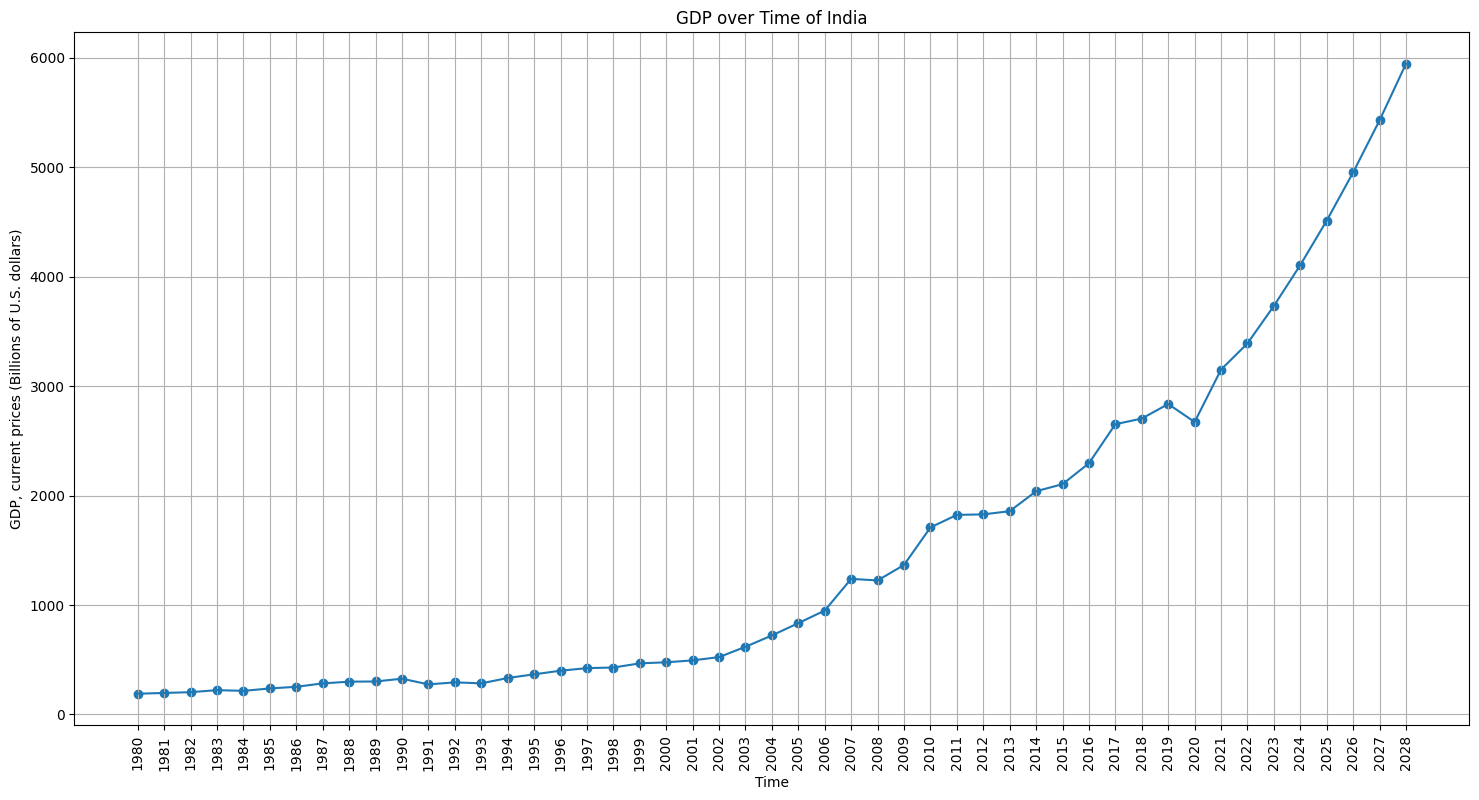

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(country_melted_df['year'], country_melted_df['gdp'])
plt.scatter(country_melted_df['year'], country_melted_df['gdp'])
plt.title(f'GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP, current prices (Billions of U.S. dollars)')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.figsave('gdpraw.png')

<Figure size 3600x1200 with 0 Axes>

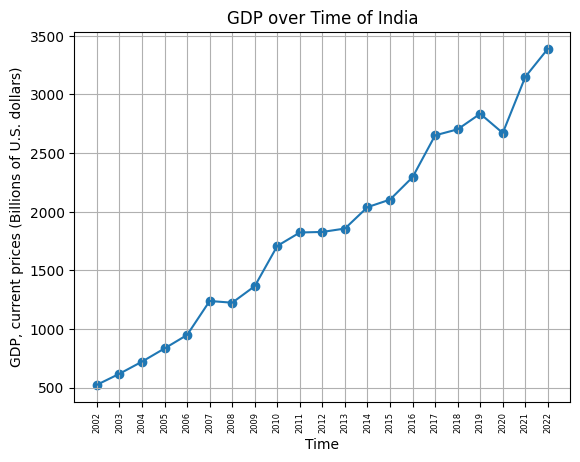

<Figure size 3600x1200 with 0 Axes>

In [ ]:
temp = country_melted_df[country_melted_df['year'].astype(int) >= 2002]
temp = temp[temp['year'].astype(int) <= 2022]

plt.plot(temp['year'], temp['gdp'])
plt.scatter(temp['year'], temp['gdp'])
plt.title(f'GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP, current prices (Billions of U.S. dollars)')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(fontsize=6)
plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.figure(figsize=(36, 12))

#### After

In [ ]:
# before
transformed_gdp_df = transformed_gdp_df[cleaned_gdp_df['country'] == country_of_choice]
transformed_gdp_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
62,6.78,6.79,6.82,6.87,6.93,7.03,6.95,7.08,7.17,7.13,...,7.18,7.24,7.29,7.36,7.33,7.38,7.35,7.35,7.39,India


In [ ]:
transformed_country_melted_df = pd.melt(transformed_gdp_df, id_vars=['country'], var_name='year', value_name='gdp')
transformed_country_melted_df.head()

,country,year,gdp
0,India,2002,6.78
1,India,2003,6.79
2,India,2004,6.82
3,India,2005,6.87
4,India,2006,6.93


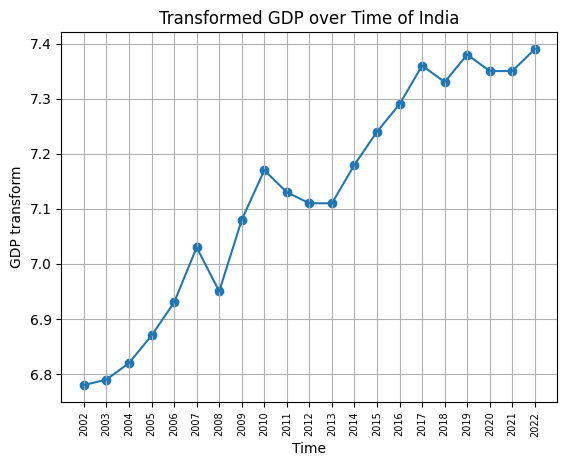

In [ ]:
plt.plot(transformed_country_melted_df['year'], transformed_country_melted_df['gdp'])
plt.scatter(transformed_country_melted_df['year'], transformed_country_melted_df['gdp'])
plt.title(f'Transformed GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP transform')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(fontsize=7)
plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.show()

In [ ]:
cleaned_gdp_df.tail()

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
167,Middle East and Central Asia,527.714,588.285,581.559,591.099,599.786,617.744,626.892,743.168,780.507,...,3820.148,3412.564,3995.072,4750.874,4698.168,4893.834,5168.551,5442.165,5743.487,6066.951
168,Other advanced economies,775.274,790.860,785.664,784.097,821.924,819.463,999.432,1230.294,1450.500,...,7451.982,7404.808,8568.574,8581.514,8800.731,9147.297,9605.214,10061.637,10511.283,10975.395
169,Sub-Saharan Africa,317.456,335.793,338.583,311.806,247.335,225.926,257.466,279.882,301.615,...,1768.224,1672.529,1886.949,2013.032,1957.231,2084.818,2271.584,2458.237,2654.768,2875.895
170,World,11232.069,11526.241,11310.303,11610.283,12025.117,12553.732,14793.158,17032.786,19156.083,...,87325.540,84960.903,96487.666,100135.361,104476.432,109734.270,115598.839,121580.994,127499.667,133782.888
171,"©IMF, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
